In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Load Titanic dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving Titanic.csv to Titanic (3).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


In [ ]:
print(df['Sex'].unique())

['male' 'female']


In [ ]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
# Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Define features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

<ipython-input-43-06684956aca1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [ ]:
df['Sex']

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
X_test.shape[0]

179

Accuracy: 0.8212
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:


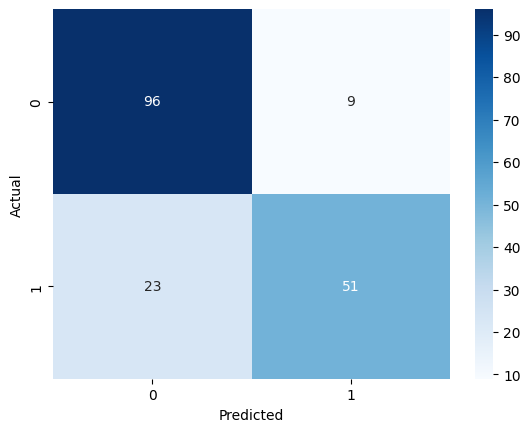

In [ ]:
# Train model
features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X_train =pd.get_dummies(X_train[features])
X_test = pd.get_dummies(X_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**KNN**

KNN Accuracy: 0.7654
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

KNN Confusion Matrix:


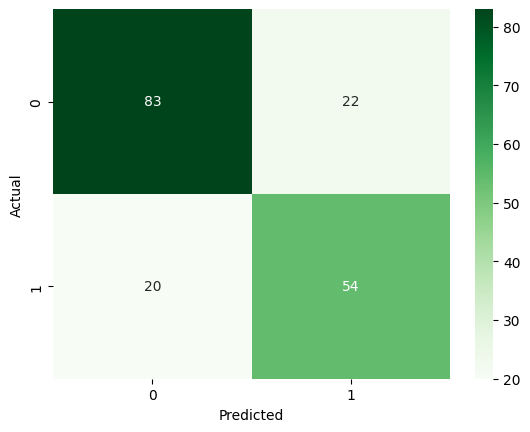

In [ ]:
# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f'KNN Accuracy: {knn_accuracy:.4f}')
print('KNN Classification Report:')
print(classification_report(y_test, knn_y_pred))
print('KNN Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**SVM**

SVM Accuracy: 0.6089
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.99      0.75       105
           1       0.83      0.07      0.12        74

    accuracy                           0.61       179
   macro avg       0.72      0.53      0.44       179
weighted avg       0.70      0.61      0.49       179

SVM Confusion Matrix:


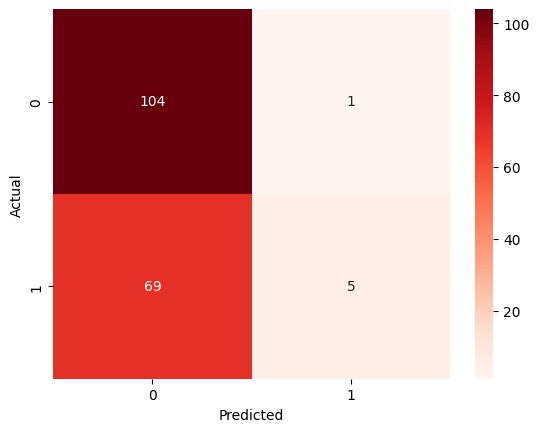

In [ ]:
# SVM Model
svm_model = SVC(kernel='rbf', random_state=42)  # You can tune kernel and other parameters
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'SVM Accuracy: {svm_accuracy:.4f}')
print('SVM Classification Report:')
print(classification_report(y_test, svm_y_pred))
print('SVM Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test, svm_y_pred), annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()